In [8]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
# === CONFIGURATION ===
PICKLE_PATH = 'D:/Study/Ai_Music_Composer/project/data/note_sequences.pkl'
MODEL_SAVE_PATH = 'D:/Study/Ai_Music_Composer/project/models/lstm_model.h5'
SEQUENCE_LENGTH = 20
MAX_SEQUENCE_LENGTH = 50  # Cap max length to avoid memory issues
EMBEDDING_DIM = 100
EPOCHS = 20
BATCH_SIZE = 64

In [10]:
# === LOAD DATA ===
with open(PICKLE_PATH, 'rb') as f:
    data = pickle.load(f)
    
note_seqs = data['sequences']
labels = data['labels']

print(f"✅ Loaded {len(note_seqs)} sequences.")

✅ Loaded 7992180 sequences.


In [11]:
# === STEP 2: Flatten notes and create vocabulary ===
all_notes = sorted(set(n for seq in note_seqs for n in seq))
note2int = {note: i + 1 for i, note in enumerate(all_notes)}  # +1 to reserve 0 for padding
int2note = {i: note for note, i in note2int.items()}
vocab_size = len(note2int) + 1  # +1 for padding

In [12]:
# === STEP 3: Encode Note Sequences ===
encoded_sequences = [[note2int[n] for n in seq] for seq in note_seqs]
padded_sequences = pad_sequences(encoded_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [13]:
# === STEP 4: Encode Labels ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

print(f"🎵 Vocab size: {vocab_size} | 🏷️ Classes: {len(label_encoder.classes_)}")

🎵 Vocab size: 129 | 🏷️ Classes: 4


In [14]:
# === STEP 5: Split Data ===
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, y_categorical, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
X_train = X_train[:200000]
y_train = y_train[:200000]
X_val = X_val[:20000]
y_val = y_val[:20000]
X_test = X_test[:20000]
y_test = y_test[:20000]

In [16]:
# === STEP 6: Define LSTM Model ===
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\OMKAR JHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# === STEP 7: Train Model ===
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 435s 137ms/step - accuracy: 0.3256 - loss: 1.3535 - val_accuracy: 0.3291 - val_loss: 1.3496
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 430s 138ms/step - accuracy: 0.3170 - loss: 1.3612 - val_accuracy: 0.3101 - val_loss: 1.3621
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 382s 122ms/step - accuracy: 0.3106 - loss: 1.3636 - val_accuracy: 0.3099 - val_loss: 1.3622
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 380s 122ms/step - accuracy: 0.3128 - loss: 1.3637 - val_accuracy: 0.3099 - val_loss: 1.3621
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 371s 119ms/step - accuracy: 0.3114 - loss: 1.3637 - val_accuracy: 0.3099 - val_loss: 1.3624
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 373s 119ms/step - accuracy: 0.3107 - loss: 1.3643 - val_accuracy: 0.3099 - val_loss: 1.3622
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 384s 123ms/step - accuracy: 0.3131 - loss: 1.3629 - val_accuracy: 0.3099 - val_loss: 1.3622
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 413s 132ms/step - ac

In [18]:
# === STEP 8: Evaluate ===
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4137 - loss: 1.2134

✅ Test Accuracy: 41.35%


In [19]:
# === STEP 9: Save Model & Label Encoder ===
model.save('D:/Study/Ai_Music_Composer/project/models/lstm_mood_classifier.h5')
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

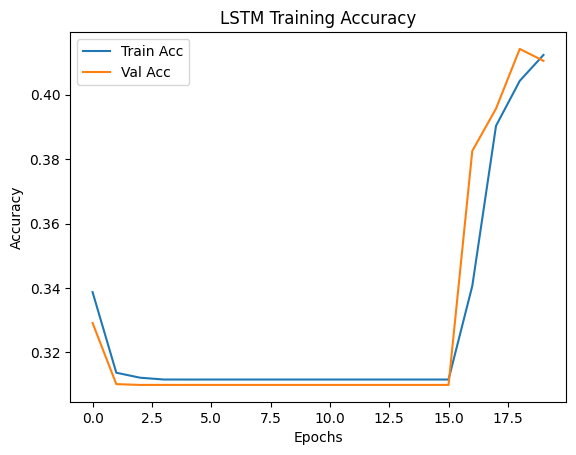

In [20]:
# === STEP 10: Plot Training History ===
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("LSTM Training Accuracy")
plt.show()